Enter your image path: picture.jpg
Enter your output format (png, pdf): png
Converge after  49  iterations
The time of execution of kmeans algorithm is : 86.85674285888672 s


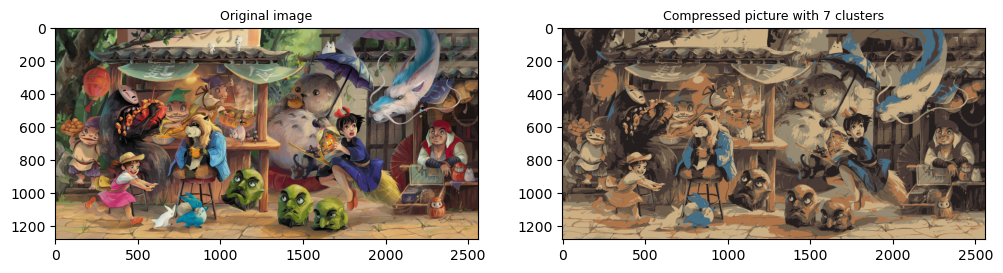

In [1]:
import os
import time
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def get_img_1d(image_path):
    image = plt.imread(image_path)
    img_1d = np.array(image)
    img_1d = img_1d.reshape(img_1d.shape[0] * img_1d.shape[1], img_1d.shape[2])
    return img_1d

def get_original_dimension(img_1d, row, column, num_channel = 3):
    orig_img = img_1d.reshape(row, column, num_channel)
    return orig_img

def init_centroid(img_1d, k_cluster, method = "random"):
    centroid = np.empty((k_cluster, img_1d.shape[1]), dtype = img_1d.dtype)
    if method == "random":
        return np.random.choice(256, size = (k_cluster, img_1d.shape[1]), replace=False)
    elif method == "in_pixels":
        for i in range(k_cluster):
            centroid[i] = img_1d[np.random.choice(img_1d.shape[0], replace = False)]
    return centroid

def label_pixel(img_1d, centroid):
    #parameter centroid is a array: [[a b c] [d e f]]
    #calculate Euclidean distance
    # np.linalg.norm in numpy to calculate

    distances = np.linalg.norm(centroid[:, np.newaxis] - img_1d, axis = 2)
    labels = np.argmin(distances, axis = 0)
    return labels

def update_centroid(img_1d, centroid, k_cluster, label):
    updated_centroid = np.empty((k_cluster, img_1d.shape[1]))
    for i in range(k_cluster):
        pixels_in_cluster = img_1d[label == i]
        if pixels_in_cluster.shape[0] > 0:
            updated_centroid[i] = np.mean(pixels_in_cluster, axis=0)
    return updated_centroid
    
#label = label_pixel(img_1d, centroid, k_cluster)

def kmeans(img_1d, k_clusters, max_iter, init_centroids="random"):
    
    centroid = init_centroid(img_1d, k_clusters, init_centroids)
    label = label_pixel(img_1d, centroid)
    pre_centroid = centroid.copy()
    converge_cnt = 0
    
    while converge_cnt < max_iter:
        centroid = update_centroid(img_1d, centroid, k_clusters, label)
        if np.allclose(pre_centroid, centroid, atol = 1e-05):
            print("Converge after ",converge_cnt," iterations")
            break
        
        pre_centroid = centroid.copy()
        label = label_pixel(img_1d, centroid)
        converge_cnt += 1
        
    if converge_cnt == max_iter:
        print("Image stop iterating after ",converge_cnt, " - max_iter.")
    
    res_arr = assign_new_color(img_1d, centroid, label, k_clusters)
    return res_arr
    
def assign_new_color(img_1d, centroid, label, k_cluster):
    for i in range(k_cluster):
        idx = np.where(label == i)
        img_1d[idx] = centroid[i]
                
    return img_1d

def main():
    #get input picture
    img_path = input("Enter your image path: ")
    
    #show original picture
    image = plt.imread(img_path)
    image_arr = np.array(image)
    plt.figure(figsize=(12, 12))
    plt.subplot(2,2,1)
    plt.imshow(image_arr)
    plt.title("Original image",size = 9)
    
    #get output format
    #get the new output_path with orignal file name with new output format.
    img_name = os.path.basename(img_path).split('.')[0]
    output = input("Enter your output format (png, pdf): ")
    output_path = f"./{img_name}.{output}"
    
    #change matrix of picture and compress color
    img_1d = get_img_1d(img_path)
    max_iter = 200
    k_clusters = 7
        # record start time
    start = time.time()
    kmeans(img_1d, k_clusters, max_iter, init_centroids="in_pixels")
    result_picture = get_original_dimension(img_1d, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2])
        #record end time
    end = time.time()
    print("The time of execution of kmeans algorithm is :",end-start, "s")
    
    #show picture after being compressed
    plt.subplot(2,2,2)  
    plt.imshow(result_picture)
    title_res = "Compressed picture with " + str(k_clusters) + " clusters"
    plt.title(title_res,size = 9)
    
    #export new picture output file
    im = Image.fromarray(result_picture,'RGB')
    im.save(output_path)
    
if __name__ == "__main__":
    main()
